In [1]:
# ML Final Project (Predicting the number of negative votes for YouTube videos)
# name = pouya ahadpour bakhtiari
# bootcamp = 20
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('C:/Users/DELL/Desktop/python/test.csv',index_col = 0)
df2 = pd.read_csv('C:/Users/DELL/Desktop/python/train.csv',index_col = 0)

In [3]:
df1.sample(50)

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
upload_date,,,,,,,,,,,
20200416,117,4,2,0,False,False,True,False,True,Directos i videos de GTA FIFA FORTNITE...,Escuats con los TT
20160425,983,1090,11,0,False,False,True,False,False,Canción karaoke vampiro al estilo de Maquiavel...,"Maquiavelia - Vampiro (karaoke, letra e imágenes)"
20210503,53,749,6,1,True,False,False,False,False,NaN,PLANIFICACIONES ACCIONES CREATIVAS PARA PROMOV...
20130620,2850000,31513,75,47,False,True,False,False,False,Notun Notun Bengali Rhymes\n\nDawsenTv present...,Notun Notun Bengali Rhymes
20200204,-1,760138,1565,501,False,True,True,False,False,#Tinthờisựmớinhất24h#Tintứcthờisự24h#tinbiểnđô...,TIN BIỂN ĐÔNG 31/5/21: HOAN HÔ - SINGAPOR NÃ 3...
20200318,-1,136,17,1,False,True,True,False,False,NaN,Sun le BHAI dj aale..... Tik tok song
20181026,19,8,0,0,False,False,True,False,False,NaN,making someone do splits with tazer in jailbreak
20200330,157,87,1,0,False,False,True,False,False,Video from Priya,Example 4 of exercise 8.1 for bsc 3rd year
20210411,36900,14,0,0,False,False,True,False,False,"joyeux anniversaire, joyeux, anniversaire, Joy...",JOYEUX ANNIVERSAIRE ANDRÉ


In [4]:
df1.shape

(337097, 11)

In [5]:
df2.sample(50)

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
upload_date,,,,,,,,,,,
20200520,166,21,5,0,True,False,True,False,False,https://www.facebook.com/lieu.buong,Ai muốn ghép video liên hẹ với mik nhé | video...
20120212,63,1485,4,0,False,False,True,False,False,I created this video with the YouTube Video Ed...,aetos florinas apoxionismos
20070929,28,252,0,2,False,True,True,False,False,"Ramadan Kareem Fire Works Display\r\nSept. 13,...",Ramadan Kareem Fire Works Display
20100816,3230,16,0,0,False,False,True,False,False,RAIL at Taste of Edmonds 08/15/10,RAIL / More at the Taste of Edmonds 2010
20210314,145,6,2,1,True,False,True,False,False,NaN,mechendo com redstone #1
20211104,1510,124,12,0,False,False,True,False,False,#外交部 #汪文斌 #澳大利亚,【外交部】汪文斌 ：澳大利亚政府应当给国际社会一个负责任的交代
20180707,59000,405,7,0,True,False,True,False,False,The Main Objectives of the Course\n\nAspen Plu...,Workshop: Hexane-Octane Binary Diagrams (T-xy)...
20180523,598,12,1,0,False,False,True,False,False,NaN,BNSF Argyle Ia. 03-12-18
20210126,556,19,0,0,False,False,True,False,False,Welcome to Primate Monkey channel...!!\nMG! Wh...,"MG! What Monkey Rose Doing With Water?,Dose Ro..."


In [6]:
df2.shape

(671277, 11)

In [7]:
all_equal = True

for i in range(11):
    all_equal = all_equal and (df1.columns[i] == df2.columns[i])

if all_equal:
    print('Same columns in all dataframes!')

Same columns in all dataframes!


In [8]:
data = pd.concat([df1,df2])
data = data.reset_index(drop=True)

In [9]:
data.shape

(1008374, 11)

# Data Cleaning :

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008374 entries, 0 to 1008373
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   uploader_sub_count   1008374 non-null  int64 
 1   view_count           1008374 non-null  int64 
 2   like_count           1008374 non-null  int64 
 3   dislike_count        1008374 non-null  int64 
 4   has_subtitles        1008374 non-null  bool  
 5   is_ads_enabled       1008374 non-null  bool  
 6   is_comments_enabled  1008374 non-null  bool  
 7   is_age_limit         1008374 non-null  bool  
 8   is_live_content      1008374 non-null  bool  
 9   description          757086 non-null   object
 10  title                1008361 non-null  object
dtypes: bool(5), int64(4), object(2)
memory usage: 51.0+ MB


In [11]:
data.nunique()

uploader_sub_count       4615
view_count              60903
like_count              10592
dislike_count            2403
has_subtitles               2
is_ads_enabled              2
is_comments_enabled         2
is_age_limit                2
is_live_content             2
description            730045
title                  997015
dtype: int64

In [12]:
data.duplicated().sum()

51

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.isna().sum()

uploader_sub_count          0
view_count                  0
like_count                  0
dislike_count               0
has_subtitles               0
is_ads_enabled              0
is_comments_enabled         0
is_age_limit                0
is_live_content             0
description            251259
title                      13
dtype: int64

In [16]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count      0.000000
view_count              0.000000
like_count              0.000000
dislike_count           0.000000
has_subtitles           0.000000
is_ads_enabled          0.000000
is_comments_enabled     0.000000
is_age_limit            0.000000
is_live_content         0.000000
description            24.918503
title                   0.001289
dtype: float64

In [17]:
data.replace('-1',np.nan,inplace=True)
data.loc[data['uploader_sub_count']== -1, 'uploader_sub_count' ] = np.nan
data.loc[data['view_count']== -1, 'view_count' ] = np.nan
data.loc[data['like_count']== -1, 'like_count' ] = np.nan
data.loc[data['dislike_count']== -1, 'dislike_count' ] = np.nan

In [18]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count      9.026175
view_count              0.000000
like_count              0.000000
dislike_count           0.000000
has_subtitles           0.000000
is_ads_enabled          0.000000
is_comments_enabled     0.000000
is_age_limit            0.000000
is_live_content         0.000000
description            24.918503
title                   0.001488
dtype: float64

In [19]:
data['uploader_sub_count'] = data['uploader_sub_count'].fillna(data['uploader_sub_count'].median())

In [20]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count      0.000000
view_count              0.000000
like_count              0.000000
dislike_count           0.000000
has_subtitles           0.000000
is_ads_enabled          0.000000
is_comments_enabled     0.000000
is_age_limit            0.000000
is_live_content         0.000000
description            24.918503
title                   0.001488
dtype: float64

In [21]:
data

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
0,2860.0,2869.0,39.0,2.0,False,False,True,False,False,Subscribe for more Videos\n___________________...,Enna kavi Padinallum - Sid Sriram - கண்ணில் நீ...
1,1470.0,190.0,3.0,0.0,False,False,True,False,False,#Leksione #Kontabilitet #Shqip\n\nHapja e kët...,SITUACIONET DHE RREGJISTRIMI I KONTRATAVE TE...
2,2660.0,944.0,91.0,0.0,False,False,True,False,False,TWD: DARYL & CAROL (!THE END GAME!)\n=========...,TWD: DARYL & CAROL (!THE END GAME!)
3,55.0,4772.0,15.0,3.0,False,True,True,False,False,NaN,رياض حسن ايلاما ايلاما
4,148.0,130.0,6.0,1.0,False,False,True,False,True,CS:GO будь в курсе кто папа),Дневной спантанный стрим!!!
...,...,...,...,...,...,...,...,...,...,...,...
1008369,26.0,25.0,0.0,0.0,False,False,True,False,False,Filmed at Dead Horse Trauma's CD release show ...,Stone Park Ritual - The Break Live at Whiskey ...
1008370,187.0,1.0,0.0,0.0,True,False,True,False,False,NaN,dialogo a las 7 05 febrero 2018 06 42 04 a m
1008371,1290.0,118.0,0.0,0.0,True,False,True,False,False,"Credits:Text from Wikipedia,video auto-generat...",Τόνια Σωτηροπούλου - Σπουδές
1008372,511.0,18.0,0.0,0.0,True,False,True,False,False,NaN,wonderful dressing in pregnancy


In [22]:
data['description'] = data['description'].fillna('Unknown')

In [23]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count     0.000000
view_count             0.000000
like_count             0.000000
dislike_count          0.000000
has_subtitles          0.000000
is_ads_enabled         0.000000
is_comments_enabled    0.000000
is_age_limit           0.000000
is_live_content        0.000000
description            0.000000
title                  0.001488
dtype: float64

In [24]:
data['title'] = data['title'].fillna('Unknown')

In [25]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count     0.0
view_count             0.0
like_count             0.0
dislike_count          0.0
has_subtitles          0.0
is_ads_enabled         0.0
is_comments_enabled    0.0
is_age_limit           0.0
is_live_content        0.0
description            0.0
title                  0.0
dtype: float64

In [26]:
data

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
0,2860.0,2869.0,39.0,2.0,False,False,True,False,False,Subscribe for more Videos\n___________________...,Enna kavi Padinallum - Sid Sriram - கண்ணில் நீ...
1,1470.0,190.0,3.0,0.0,False,False,True,False,False,#Leksione #Kontabilitet #Shqip\n\nHapja e kët...,SITUACIONET DHE RREGJISTRIMI I KONTRATAVE TE...
2,2660.0,944.0,91.0,0.0,False,False,True,False,False,TWD: DARYL & CAROL (!THE END GAME!)\n=========...,TWD: DARYL & CAROL (!THE END GAME!)
3,55.0,4772.0,15.0,3.0,False,True,True,False,False,Unknown,رياض حسن ايلاما ايلاما
4,148.0,130.0,6.0,1.0,False,False,True,False,True,CS:GO будь в курсе кто папа),Дневной спантанный стрим!!!
...,...,...,...,...,...,...,...,...,...,...,...
1008369,26.0,25.0,0.0,0.0,False,False,True,False,False,Filmed at Dead Horse Trauma's CD release show ...,Stone Park Ritual - The Break Live at Whiskey ...
1008370,187.0,1.0,0.0,0.0,True,False,True,False,False,Unknown,dialogo a las 7 05 febrero 2018 06 42 04 a m
1008371,1290.0,118.0,0.0,0.0,True,False,True,False,False,"Credits:Text from Wikipedia,video auto-generat...",Τόνια Σωτηροπούλου - Σπουδές
1008372,511.0,18.0,0.0,0.0,True,False,True,False,False,Unknown,wonderful dressing in pregnancy


In [27]:
data.drop(columns=['description', 'title'], inplace=True)

In [28]:
data.dropna(inplace=True)

# Encoding :

In [29]:
data.reset_index(drop=True,inplace=True)

In [30]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008323 entries, 0 to 1008322
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   uploader_sub_count   1008323 non-null  float64
 1   view_count           1008323 non-null  float64
 2   like_count           1008323 non-null  float64
 3   dislike_count        1008323 non-null  float64
 4   has_subtitles        1008323 non-null  bool   
 5   is_ads_enabled       1008323 non-null  bool   
 6   is_comments_enabled  1008323 non-null  bool   
 7   is_age_limit         1008323 non-null  bool   
 8   is_live_content      1008323 non-null  bool   
dtypes: bool(5), float64(4)
memory usage: 35.6 MB


In [32]:
data.nunique()

uploader_sub_count      4614
view_count             60903
like_count             10592
dislike_count           2403
has_subtitles              2
is_ads_enabled             2
is_comments_enabled        2
is_age_limit               2
is_live_content            2
dtype: int64

In [33]:
data.isna().sum() / data.shape[0] * 100

uploader_sub_count     0.0
view_count             0.0
like_count             0.0
dislike_count          0.0
has_subtitles          0.0
is_ads_enabled         0.0
is_comments_enabled    0.0
is_age_limit           0.0
is_live_content        0.0
dtype: float64

In [34]:
data.sample(50)

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
296936,152.0,109.0,2.0,0.0,False,False,True,False,False
24483,199.0,878.0,6.0,1.0,True,True,True,False,False
943342,93.0,1.0,0.0,0.0,False,False,True,False,True
112521,8.0,3429.0,2.0,0.0,False,False,True,False,False
657648,206000.0,1347.0,32.0,1.0,False,False,False,False,False
243685,120000.0,354.0,1.0,0.0,False,False,True,False,False
462629,136.0,9.0,0.0,0.0,False,False,True,False,False
115247,64.0,13.0,0.0,0.0,False,False,True,False,False
297771,48.0,119.0,6.0,0.0,True,False,True,False,False
61961,7810.0,1178.0,85.0,0.0,True,False,True,False,False


In [35]:
data['has_subtitles']

0          False
1          False
2          False
3          False
4          False
           ...  
1008318    False
1008319     True
1008320     True
1008321     True
1008322    False
Name: has_subtitles, Length: 1008323, dtype: bool

In [36]:
data['has_subtitles']=data['has_subtitles'].map({True:1,False:0})

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008323 entries, 0 to 1008322
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   uploader_sub_count   1008323 non-null  float64
 1   view_count           1008323 non-null  float64
 2   like_count           1008323 non-null  float64
 3   dislike_count        1008323 non-null  float64
 4   has_subtitles        1008323 non-null  int64  
 5   is_ads_enabled       1008323 non-null  bool   
 6   is_comments_enabled  1008323 non-null  bool   
 7   is_age_limit         1008323 non-null  bool   
 8   is_live_content      1008323 non-null  bool   
dtypes: bool(4), float64(4), int64(1)
memory usage: 42.3 MB


In [38]:
data['is_ads_enabled']=data['is_ads_enabled'].map({True:1,False:0})
data['is_comments_enabled']=data['is_comments_enabled'].map({True:1,False:0})
data['is_age_limit']=data['is_age_limit'].map({True:1,False:0})
data['is_live_content']=data['is_live_content'].map({True:1,False:0})

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008323 entries, 0 to 1008322
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   uploader_sub_count   1008323 non-null  float64
 1   view_count           1008323 non-null  float64
 2   like_count           1008323 non-null  float64
 3   dislike_count        1008323 non-null  float64
 4   has_subtitles        1008323 non-null  int64  
 5   is_ads_enabled       1008323 non-null  int64  
 6   is_comments_enabled  1008323 non-null  int64  
 7   is_age_limit         1008323 non-null  int64  
 8   is_live_content      1008323 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 69.2 MB


In [40]:
data

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
0,2860.0,2869.0,39.0,2.0,0,0,1,0,0
1,1470.0,190.0,3.0,0.0,0,0,1,0,0
2,2660.0,944.0,91.0,0.0,0,0,1,0,0
3,55.0,4772.0,15.0,3.0,0,1,1,0,0
4,148.0,130.0,6.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1008318,26.0,25.0,0.0,0.0,0,0,1,0,0
1008319,187.0,1.0,0.0,0.0,1,0,1,0,0
1008320,1290.0,118.0,0.0,0.0,1,0,1,0,0
1008321,511.0,18.0,0.0,0.0,1,0,1,0,0


# Outlier Detection :

In [41]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [42]:
isf = IsolationForest(n_estimators=100 , max_features=0.5 , contamination=0.05 , bootstrap=True)

In [43]:
outliers_isf = isf.fit_predict(data.drop(columns=['view_count'])) == -1
outliers_isf

array([False, False, False, ..., False, False, False])

In [44]:
outliers_isf.sum()

50417

In [45]:
data[outliers_isf]

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
69,108000.0,6634.0,862.0,7.0,1,0,1,1,0
106,8510.0,21831.0,209.0,8.0,0,1,0,0,0
136,24700.0,605.0,64.0,1.0,1,1,1,0,1
166,6230.0,72999.0,1909.0,101.0,0,0,1,0,0
177,603000.0,440.0,15.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1008208,1150000.0,225979.0,2783.0,132.0,0,1,1,0,0
1008217,681000.0,1446.0,38.0,5.0,0,1,1,0,0
1008239,10400000.0,955.0,3.0,3.0,0,1,1,0,0
1008263,1950.0,796.0,33.0,3.0,1,1,1,0,1


In [46]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(data.drop(columns=['view_count'])) == -1

In [47]:
outliers_lof.sum()

49535

In [48]:
data[outliers_lof]

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
9,209.0,163.0,2.0,0.0,0,1,1,0,0
12,3.0,26.0,1.0,1.0,1,0,1,0,0
22,180.0,18.0,0.0,0.0,1,0,1,0,1
35,293.0,12.0,0.0,0.0,0,0,1,0,1
45,74.0,78.0,0.0,1.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1008238,177.0,0.0,0.0,0.0,0,0,0,0,0
1008247,61.0,75.0,0.0,0.0,0,1,0,0,0
1008285,384.0,4916.0,23.0,2.0,0,1,1,0,0
1008288,11.0,51.0,3.0,0.0,0,1,0,0,0


In [49]:
np.logical_and(outliers_lof, outliers_isf).sum()

184

In [50]:
data = data[np.logical_not(np.logical_and(outliers_lof, outliers_isf))]

In [51]:
#data = data[np.logical_not(np.logical_or(outliers_lof, outliers_isf))]

In [52]:
data.reset_index(drop=True, inplace=True)

In [53]:
data

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
0,2860.0,2869.0,39.0,2.0,0,0,1,0,0
1,1470.0,190.0,3.0,0.0,0,0,1,0,0
2,2660.0,944.0,91.0,0.0,0,0,1,0,0
3,55.0,4772.0,15.0,3.0,0,1,1,0,0
4,148.0,130.0,6.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1008134,26.0,25.0,0.0,0.0,0,0,1,0,0
1008135,187.0,1.0,0.0,0.0,1,0,1,0,0
1008136,1290.0,118.0,0.0,0.0,1,0,1,0,0
1008137,511.0,18.0,0.0,0.0,1,0,1,0,0


In [54]:
data.shape

(1008139, 9)

In [55]:
isf = IsolationForest(n_estimators=100 , max_features=0.5 , contamination=0.05 , bootstrap=True)
outliers_isf = isf.fit_predict(data.drop(columns=['uploader_sub_count'])) == -1
outliers_isf

array([False, False, False, ..., False, False, False])

In [56]:
outliers_isf.sum()

50407

In [57]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(data.drop(columns=['uploader_sub_count'])) == -1
outliers_lof

array([False, False, False, ..., False, False, False])

In [58]:
outliers_lof.sum()

48065

In [59]:
np.logical_and(outliers_lof, outliers_isf).sum()

22

In [60]:
data = data[np.logical_not(np.logical_and(outliers_lof, outliers_isf))]

In [61]:
#data = data[np.logical_not(np.logical_or(outliers_lof, outliers_isf))]

In [62]:
data.reset_index(drop=True, inplace=True)

In [63]:
data.shape

(1008117, 9)

In [64]:
isf = IsolationForest(n_estimators=100 , max_features=0.5 , contamination=0.05 , bootstrap=True)
outliers_isf = isf.fit_predict(data.drop(columns=['like_count'])) == -1
outliers_isf

array([False, False, False, ..., False, False, False])

In [65]:
outliers_isf.sum()

50406

In [66]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(data.drop(columns=['like_count'])) == -1
outliers_lof

array([False, False, False, ..., False, False,  True])

In [67]:
outliers_lof.sum()

50406

In [68]:
np.logical_and(outliers_lof, outliers_isf).sum()

3524

In [69]:
data = data[np.logical_not(np.logical_and(outliers_lof, outliers_isf))]

In [70]:
#data = data[np.logical_not(np.logical_or(outliers_lof, outliers_isf))]

In [71]:
data.reset_index(drop=True, inplace=True)

In [72]:
data.shape

(1004593, 9)

In [73]:
isf = IsolationForest(n_estimators=100 , max_features=0.5 , contamination=0.05 , bootstrap=True)
outliers_isf = isf.fit_predict(data.drop(columns=['dislike_count'])) == -1
outliers_isf

array([False, False, False, ..., False, False, False])

In [74]:
outliers_isf.sum()

50230

In [75]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(data.drop(columns=['dislike_count'])) == -1
outliers_lof

array([False, False, False, ..., False, False, False])

In [76]:
outliers_lof.sum()

50230

In [77]:
np.logical_and(outliers_lof, outliers_isf).sum()

3922

In [78]:
data = data[np.logical_not(np.logical_and(outliers_lof, outliers_isf))]

In [79]:
#data = data[np.logical_not(np.logical_or(outliers_lof, outliers_isf))]

In [80]:
data.reset_index(drop=True, inplace=True)

In [81]:
data.shape

(1000671, 9)

In [82]:
data

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
0,2860.0,2869.0,39.0,2.0,0,0,1,0,0
1,1470.0,190.0,3.0,0.0,0,0,1,0,0
2,2660.0,944.0,91.0,0.0,0,0,1,0,0
3,55.0,4772.0,15.0,3.0,0,1,1,0,0
4,148.0,130.0,6.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1000666,26.0,25.0,0.0,0.0,0,0,1,0,0
1000667,187.0,1.0,0.0,0.0,1,0,1,0,0
1000668,1290.0,118.0,0.0,0.0,1,0,1,0,0
1000669,511.0,18.0,0.0,0.0,1,0,1,0,0


In [83]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)
outliers = data[labels == -1]
data_cleaned = data[labels != -1]

# Data Transformation :

In [84]:
data.describe()

,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content
count,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06,1.000671e+06
mean,7.995586e+04,1.341395e+04,2.036060e+02,1.090442e+01,4.215901e-01,1.174112e-01,9.114814e-01,4.101248e-03,6.095010e-02
std,1.137221e+06,2.640360e+05,4.062919e+03,3.501132e+02,4.938139e-01,3.219098e-01,2.840478e-01,6.390956e-02,2.392389e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.800000e+01,3.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,3.840000e+02,1.480000e+02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.470000e+03,9.270000e+02,1.900000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.440000e+08,4.314944e+07,1.270673e+06,2.137720e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [86]:
mas = MaxAbsScaler()

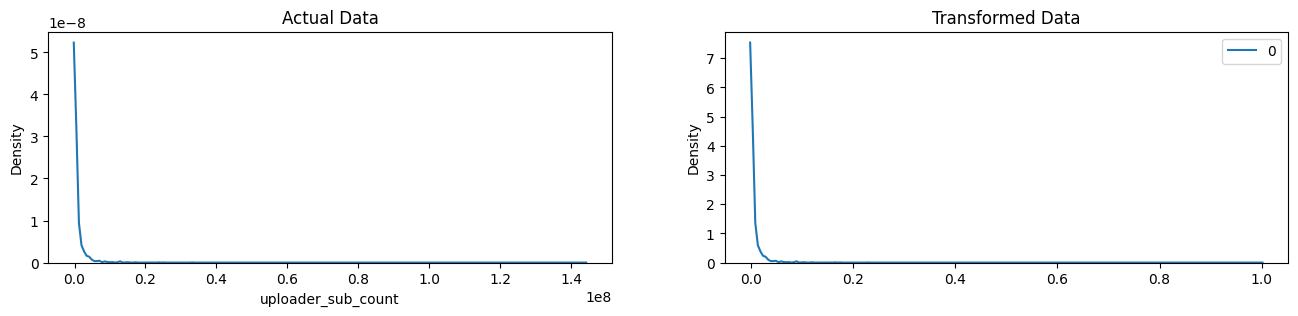

In [87]:
plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.title('Actual Data')
sns.kdeplot(data['uploader_sub_count'])

plt.subplot(122)
plt.title('Transformed Data')
sns.kdeplot(mas.fit_transform(data[['uploader_sub_count']]));

In [88]:
mms = MinMaxScaler(feature_range=(0, 1))
mms.fit_transform(data[['view_count']]).max()

1.0

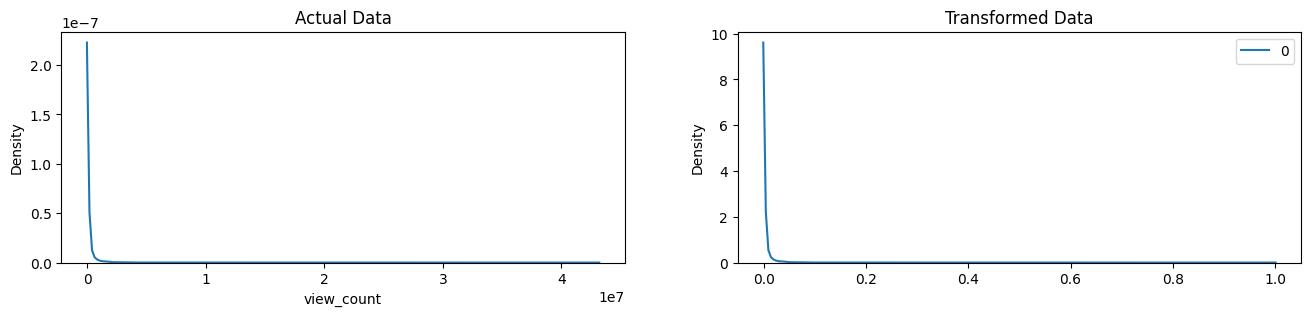

In [89]:
plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.title('Actual Data')
sns.kdeplot(data['view_count'])

plt.subplot(122)
plt.title('Transformed Data')
mms = MinMaxScaler(feature_range=(0, 1))
sns.kdeplot(mms.fit_transform(data[['view_count']]));

In [94]:
from sklearn.preprocessing import normalize

In [95]:
X = normalize(data.drop(columns=['like_count']))

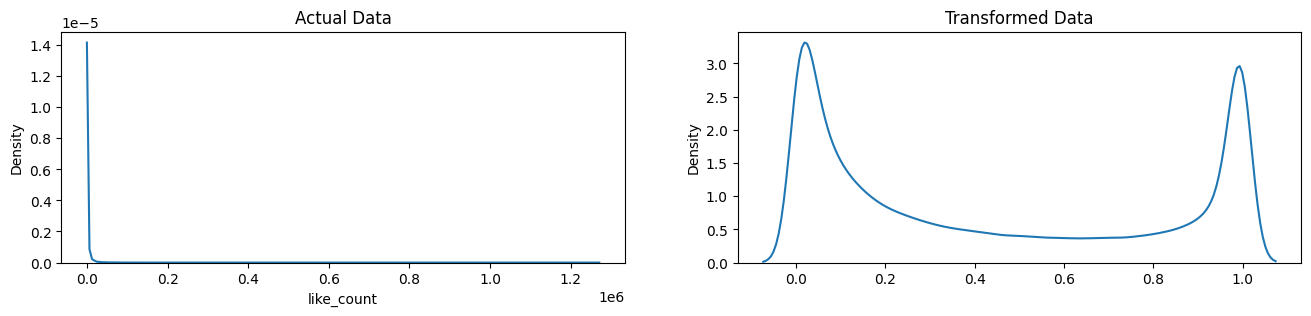

In [96]:
plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.title('Actual Data')
sns.kdeplot(data['like_count'])

plt.subplot(122)
plt.title('Transformed Data')
sns.kdeplot(X[:, 1]);

In [97]:
X = normalize(data.drop(columns=['dislike_count']))

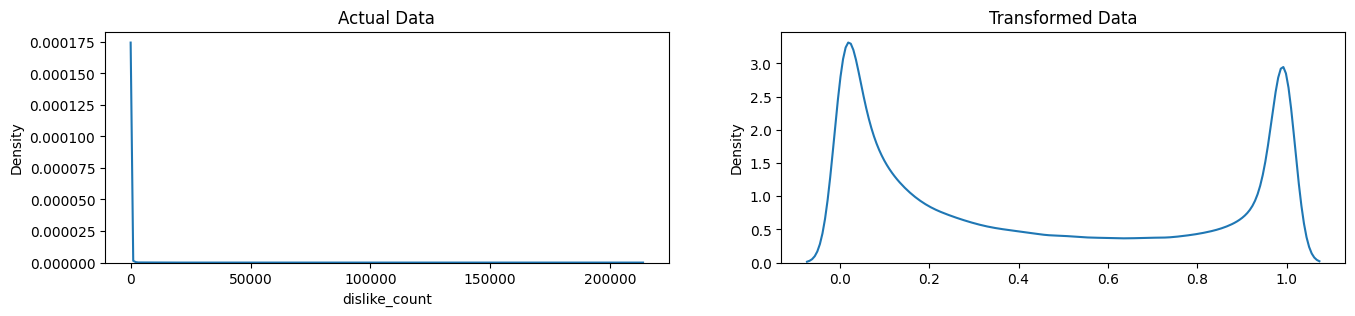

In [98]:
plt.figure(figsize=(16, 3))
plt.subplot(121)
plt.title('Actual Data')
sns.kdeplot(data['dislike_count'])

plt.subplot(122)
plt.title('Transformed Data')
sns.kdeplot(X[:, 1]);

# Regression :

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x = data.drop(columns=['dislike_count'])
y = data['dislike_count']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [102]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(750503, 8) (750503,)
(250168, 8) (250168,)


In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = lr1.predict(X_test)
y_pred

array([-2.03832119,  6.53403827, -2.06674965, ..., -1.8474875 ,
       -1.68169541, -1.96846211])

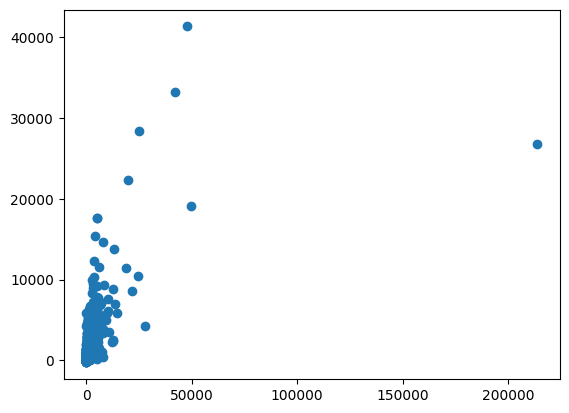

In [106]:
plt.scatter(x=y_test, y=lr1.predict(X_test))

In [107]:
lr1.coef_

array([-1.78350281e-06,  5.07409843e-04,  2.83171818e-02, -1.32927888e-01,
       -2.96901332e+00, -8.71645037e+00, -2.29315720e+00,  1.88246104e+00])

In [108]:
lr1.intercept_

6.666128798194031

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(X_train).shape

(750503, 45)

In [111]:
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [112]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train_pf, y_train)

LinearRegression(fit_intercept=False)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


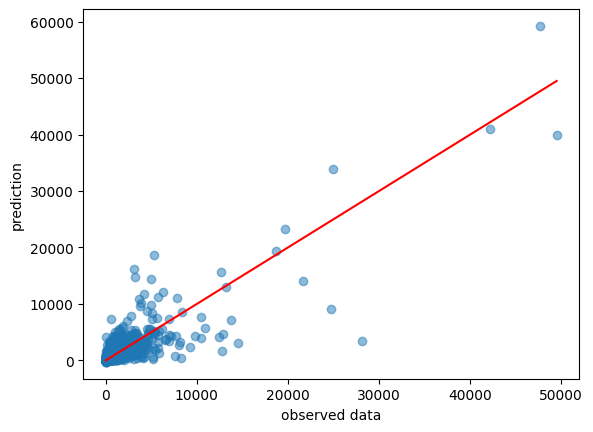

In [113]:
outlier_index = np.where((y_test > 50000) & (lr2.predict(X_test_pf) > 0))[0]

y_test_filtered = np.delete(y_test, outlier_index)
X_test_filtered = np.delete(X_test, outlier_index, axis=0)
X_test_pf_filtered = np.delete(X_test_pf, outlier_index, axis=0)

max_value = max(max(y_test_filtered), max(lr1.predict(X_test_filtered)))
x = np.arange(0, max_value, 0.01)
plt.plot(x, x, c='red')
plt.scatter(x=y_test_filtered, y=lr2.predict(X_test_pf_filtered), alpha=0.5)
plt.xlabel('observed data')
plt.ylabel('prediction')
plt.show()

In [114]:
from sklearn.linear_model import Ridge

In [115]:
lr3 = Ridge(alpha = 10)
lr3.fit(X_train_pf, y_train)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.0231e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


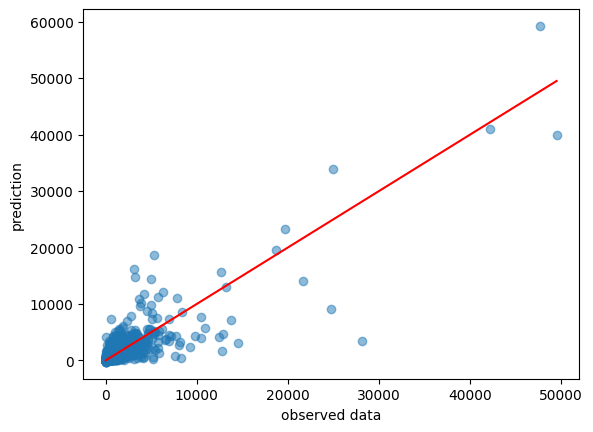

In [116]:
outlier_index = np.where((y_test > 50000) & (lr2.predict(X_test_pf) > 0))[0]

y_test_filtered = np.delete(y_test, outlier_index)
X_test_filtered = np.delete(X_test, outlier_index, axis=0)
X_test_pf_filtered = np.delete(X_test_pf, outlier_index, axis=0)

plt.scatter(x=y_test_filtered, y=lr3.predict(X_test_pf_filtered), alpha=0.5)
plt.xlabel('observed data')
plt.ylabel('prediction')

max_value = max(max(y_test_filtered), max(lr1.predict(X_test_filtered)))
x = np.arange(0, max_value, 0.01)
plt.plot(x, x, c='red')
plt.show()

In [117]:
from sklearn.linear_model import Lasso

In [118]:
lr4 = Lasso(alpha = 10)
lr4.fit(X_train_pf, y_train)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.709e+09, tolerance: 6.218e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


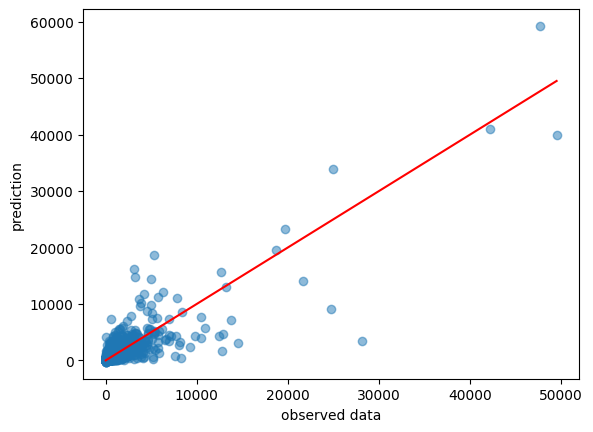

In [119]:
outlier_index = np.where((y_test > 50000) & (lr2.predict(X_test_pf) > 0))[0]

y_test_filtered = np.delete(y_test, outlier_index)
X_test_filtered = np.delete(X_test, outlier_index, axis=0)
X_test_pf_filtered = np.delete(X_test_pf, outlier_index, axis=0)

plt.scatter(x=y_test_filtered, y=lr4.predict(X_test_pf_filtered), alpha=0.5)
plt.xlabel('observed data')
plt.ylabel('prediction')

max_value = max(max(y_test_filtered), max(lr1.predict(X_test_filtered)))
x = np.arange(0, max_value, 0.01)
plt.plot(x, x, c='red')
plt.show()

In [120]:
from sklearn.linear_model import ElasticNet

In [121]:
lr5 = ElasticNet(alpha=10)
lr5.fit(X_train_pf, y_train)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.718e+09, tolerance: 6.218e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10)

C:\Users\DELL\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


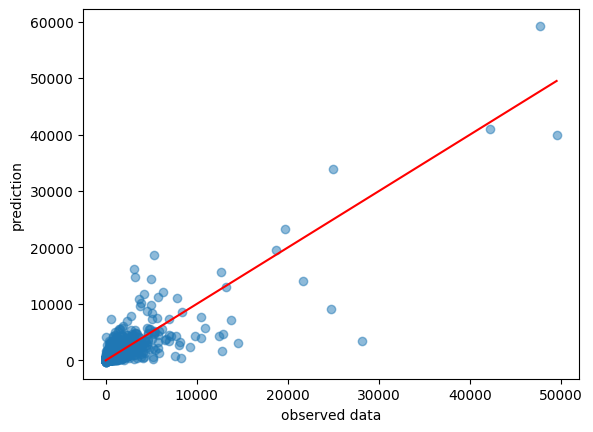

In [122]:
outlier_index = np.where((y_test > 50000) & (lr2.predict(X_test_pf) > 0))[0]

y_test_filtered = np.delete(y_test, outlier_index)
X_test_filtered = np.delete(X_test, outlier_index, axis=0)
X_test_pf_filtered = np.delete(X_test_pf, outlier_index, axis=0)

plt.scatter(x=y_test_filtered, y=lr5.predict(X_test_pf_filtered), alpha=0.5)
plt.xlabel('observed data')
plt.ylabel('prediction')

max_value = max(max(y_test_filtered), max(lr1.predict(X_test_filtered)))
x = np.arange(0, max_value, 0.01)
plt.plot(x, x, c='red')
plt.show()

In [123]:
from sklearn.metrics import max_error

In [124]:
max_err = max_error(y_test_filtered, lr5.predict(X_test_pf_filtered))
print("Maximum Error:", max_err)

Maximum Error: 24740.44305845352


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [126]:
mae_lr2 = mean_absolute_error(y_test_filtered, lr2.predict(X_test_pf_filtered))

print("Mean Absolute Error for lr4:", mae_lr2)

Mean Absolute Error for lr4: 7.600339338729685


In [127]:
mae_lr3 = mean_absolute_error(y_test_filtered, lr3.predict(X_test_pf_filtered))

print("Mean Absolute Error for lr4:", mae_lr3)

Mean Absolute Error for lr4: 7.564302623589614


In [128]:
mae_lr4 = mean_absolute_error(y_test_filtered, lr4.predict(X_test_pf_filtered))

print("Mean Absolute Error for lr4:", mae_lr4)

Mean Absolute Error for lr4: 7.049443338073545


In [129]:
mae_lr5 = mean_absolute_error(y_test_filtered, lr5.predict(X_test_pf_filtered))

print("Mean Absolute Error for lr4:", mae_lr5)

Mean Absolute Error for lr4: 7.049437521785701


In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_lr5 = r2_score(y_test_filtered, lr5.predict(X_test_pf_filtered))

print("R² Score for lr4:", r2_lr5)

R² Score for lr4: 0.7254034782828696


In [132]:
r2_lr2 = r2_score(y_test_filtered, lr2.predict(X_test_pf_filtered))

print("R² Score for lr4:", r2_lr2)

R² Score for lr4: 0.7254050393902749


In [133]:
r2_lr3 = r2_score(y_test_filtered, lr3.predict(X_test_pf_filtered))

print("R² Score for lr4:", r2_lr3)

R² Score for lr4: 0.7254240561286491


In [134]:
r2_lr4 = r2_score(y_test_filtered, lr4.predict(X_test_pf_filtered))

print("R² Score for lr4:", r2_lr4)

R² Score for lr4: 0.7254077575782445
